<a href="https://colab.research.google.com/github/Hamza-t/Language-Identification/blob/main/Data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data collection

In [ ]:
#this task is done in the python environment of my desktop with selenium and webdriver. 



```
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
#from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
data=[]
links = ["https://www.youtube.com/watch?v=Pv-REmhXldo&ab_channel=INSATOfficiel",
"https://www.youtube.com/watch?v=v8mxgrGXk9c&ab_channel=MAK9"
"https://www.youtube.com/watch?v=Vztmp21bvkE&ab_channel=IjaNa7kilek-%D8%A7%D9%8A%D8%AC%D8%A7%D9%86%D8%AD%D9%83%D9%8A%D9%84%D9%83",
"https://www.youtube.com/watch?v=kxqGfNcIk9g&ab_channel=Ceyphe",
"https://www.youtube.com/watch?v=nIHzin6MViQ&ab_channel=YassTUBE",
"https://www.youtube.com/watch?v=1U8GnZEej1I&ab_channel=AZIX",
"https://www.youtube.com/watch?v=sdyxxvw2Y6s&ab_channel=RayenBouajaja"]

with webdriver.Chrome(ChromeDriverManager().install()) as driver:
    wait = WebDriverWait(driver,15)
    for i in links : 
    	driver.get(i)

    	for item in range(500): 
        	wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
       

    	for comment in wait.until(EC.presence_of_all_elements_located((By.ID, "content-text"))):
        	data.append(comment.text)
print(data[:])

# open file in write mode
with open(r"result.txt", 'w', encoding="utf-8") as fp:
    for item in data:
        # write each item on a new line
	
        fp.write("%s\n" %item)
    print('Done')

```



In [ ]:
#Import library
import pandas as pd

In [ ]:
#Import scraped file 
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/NLP-Project-INSAT"
!ls "/content/drive/MyDrive/My_work/NLP-Project-INSAT"

data.ipynb	 khedma.xlsx  scraped_data.xlsx  train.csv
Final_data.xlsx  result.txt   tp.ipynb		 TUNIZI-Dataset.txt


In [ ]:
#assign data 
data_path = folder_path + "/" + "result.txt"

In [ ]:
#read data
scraped_data = pd.read_csv(data_path, sep="\n", header=None, names=["comments"])
scraped_data

,comments
0,THANK YOU ALL FOR BELIEVING IN US ️
1,INSAT IS OUR HOME..
2,LYRICS//
3,احب الغناء التونسي لكن للاسف الكلمات صعبة وغير...
4,غنايا واعرة بالزاف
...,...
440,إلي يقرا 1ere يحط جام
441,Ya5y w9th hiya l orientation?!
442,je suis litteraire
443,Bdit nestressa


#Task 2 : Data Cleaning

#####Objectifs:
   * **Clean text data from : URL, emojis, punctuation (?,:!..) , symbols, newlines and Tabs.** :                        
Example : To know more about this website: https://Hamza.example.com
   * **Remove Accented Characters.** : é, à, ...
   * **Reduce repeated characters.** :   eyyyyyy (mean "yes") ==> ey
   * **Remove Whitespaces** : 
 "How   are   you   doing   ?"
   * **Case Conversion** : str.lower()
   * **Contraction and Expansion**

In [ ]:
#import library
import re
import string
import unicodedata
from itertools import groupby

In [ ]:
#remove emails
def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

#remove urls
def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

#remove rt
def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

In [ ]:
#remove punctuation
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

#remove accented chars
#def remove_accented_chars(x):
#    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#    return x

#remove extra space 
def remove_space(x):
  return re.sub(' +', ' ', x)

In [ ]:
#lower text
def lower_text(text):
    return text.lower()

#Reduce repeated characters
def reshape_words(text):
    words = text.split()
    for word in words:
        i = words.index(word)
        chars = [ch for ch in words[i]]
        chars = [x[0] for x in groupby(chars)]
        words[i] = "".join(chars)
    return " ".join(words)

In [ ]:
#Contraction and Expansion
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [ ]:
#Contraction and Expansion
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

#####Application to scraped data

In [ ]:
#Functions to apply :
# remove_urls, remove_rt, remove_emails, remove_special_chars, remove_accented_chars, cont_to_exp, reshape_words, remove_space, lower_text

In [ ]:
scraped_data["comments"] = scraped_data.comments.map(lower_text)
scraped_data["comments"] = scraped_data.comments.map(remove_urls)
scraped_data["comments"] = scraped_data.comments.map(remove_rt)
scraped_data["comments"] = scraped_data.comments.map(remove_emails)
scraped_data["comments"] = scraped_data.comments.map(remove_special_chars)
#scraped_data["comments"] = scraped_data.comments.map(remove_accented_chars)
#scraped_data["comments"] = scraped_data.comments.map(cont_to_exp)
#scraped_data["comments"] = scraped_data.comments.map(reshape_words)
scraped_data["comments"] = scraped_data.comments.map(remove_space)

In [ ]:
scraped_data

,comments
0,thank you al for believing in us
1,insat is our home
2,lyrics
3,احب الغناء التونسي لكن لاسف الكلمات صعبة وغير ...
4,غنايا واعرة بالزاف
...,...
440,إلي يقرا 1ere يحط جام
441,ya5y w9th hiya l orientation
442,je suis literaire
443,bdit nestresa


#Task 3: Collecting Public datasets

###Data collection

* In this Chapter, we will collecte public datasets from many sources:


---
1) TUNIZI: (dataset in Tunisian Arabizi)
https://github.com/chaymafourati/TUNIZI-Sentiment-Analysis-Tunisian-Arabizi-Dataset

2) TSAC: (mix of Arabic, French, and Arabizi) https://github.com/fbougares/TSAC

3) Public datasets https://huggingface.co/datasets/papluca/language-identification/blob/main/train.csv




In [ ]:
# we uploaded thoses file to google drive 
!ls "/content/drive/MyDrive/My_work/NLP-Project-INSAT"

data.ipynb	 khedma.xlsx  scraped_data.xlsx  train.csv
Final_data.xlsx  result.txt   tp.ipynb		 TUNIZI-Dataset.txt


In [ ]:
#assign data 
data_path2 = folder_path + "/" + "TUNIZI-Dataset.txt"
#read data
tunizi_data_ = pd.read_csv(data_path2, sep=";", header=None, names=["pos/neg","comments"])
tunizi_data_


,pos/neg,comments
0,1,ana fil ghorba w sout el athan ahla haja 3ijbi...
1,1,man eheb rasoule mohamed
2,1,rabi yerhmou sofiane cha3ri
3,1,rabi yarahmak ya sbou3i wou yarham kol om mita
4,%1,merci beaucoup salime
...,...,...
2995,-1,aasba lik o lih
2996,-1,billah ya sa7bi 3lech t9assem fina
2997,-1,aya belehi fech t5aref enti
2998,-1,mamset zok omkom


In [ ]:
tunizi_data_.to_excel("khedma.xlsx")

In [ ]:
#We will use only positif data, as you know , we are tunisians
tunizi_data = tunizi_data_[tunizi_data_["pos/neg"] == "1"].reset_index()

* Note : Tunizi data contain only arabizi text.

In [ ]:
#read the second file 
#assign data 
data_path3 = folder_path + "/" + "train.csv"
#read data
public_data_ = pd.read_csv(data_path3)
public_data_.head()

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


* This data contain many languages, we will use only english, frensh, and arabic texts.

In [ ]:
labels = ["en", "fr", "ar"]
public_data = public_data_[public_data_.labels.isin(labels)].reset_index()

In [ ]:
public_data.drop('index', axis=1, inplace=True)

In [ ]:
public_data.head()

,labels,text
0,ar,"نعم , هذا صحيح نعم اعتقد ان هناك خطوات كبيرة ي..."
1,fr,Le produit m'avait été recommandé par mon phar...
2,fr,J'ai beaucoup ce livre cependant je n'ai pas m...
3,fr,"Sur les dix premières clés essayées, quatre in..."
4,en,Didnt really seem to work much.


###Data cleaning for public datasets

In [ ]:
#tunizi data 
tunizi_data["comments"] = tunizi_data.comments.map(lower_text)
tunizi_data["comments"] = tunizi_data.comments.map(remove_urls)
tunizi_data["comments"] = tunizi_data.comments.map(remove_rt)
tunizi_data["comments"] = tunizi_data.comments.map(remove_emails)
tunizi_data["comments"] = tunizi_data.comments.map(remove_special_chars)
#tunizi_data["comments"] = tunizi_data.comments.map(remove_accented_chars)
tunizi_data["comments"] = tunizi_data.comments.map(reshape_words)
tunizi_data["comments"] = tunizi_data.comments.map(remove_space)

In [ ]:
#public data 
public_data["text"] = public_data.text.map(lower_text)
public_data["text"] = public_data.text.map(remove_urls)
public_data["text"] = public_data.text.map(remove_rt)
public_data["text"] = public_data.text.map(remove_emails)
public_data["text"] = public_data.text.map(remove_special_chars)
#public_data["text"] = public_data.text.map(remove_accented_chars)
public_data["text"] = public_data.text.map(reshape_words)
public_data["text"] = public_data.text.map(remove_space)

#Task 4: Annotation

* Tunizi Data and public data are annotated
* Our work is to annotate the scraped data
* We will use pigeon
* Pigeon is a simple widget that lets you quickly annotate a dataset of unlabeled examples from the comfort of your Jupyter notebook.
* Ressources : https://github.com/agermanidis/pigeon

###Scraped data annotation

In [ ]:
!pip install pigeon-jupyter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#data
scraped_data.tail()

,comments
440,إلي يقرا 1ere يحط جام
441,ya5y w9th hiya l orientation
442,je suis litteraire
443,bdit nestressa
444,يا جماعا بربي جاوبوني ياخي تنجم تقرى science و...


In [ ]:
#annotation
from pigeon import annotate
annotations = annotate(
  list(scraped_data["comments"]),
  options=['English', 'French', 'Arabic', 'Tunizi', 'Code-switching']
)

'thank you all for believing in us'

In [ ]:
#OR we can do it with excel 
scraped_data.to_excel("scraped_data.xlsx")

* After annotate the data (its really hard and boring task), we will bring it from google drive as a pandas dataframe  

In [ ]:
!ls "/content/drive/MyDrive/My_work/NLP-Project-INSAT"

Data_Management.ipynb  scraped_data.xlsx  tp.ipynb
Final_data.xlsx        task1-4.ipynb	  train.csv
result.txt	       task5-7.ipynb	  TUNIZI-Dataset.txt


In [ ]:
#read data
final_scraped_data = pd.read_excel(folder_path+ "/" + "scraped_data.xlsx")

In [ ]:
final_scraped_data = final_scraped_data[["comments","labels"]]

In [ ]:
final_scraped_data.head()

,comments,labels
0,thank you al for believing in us,English
1,insat is our home,English
2,lyrics,English
3,احب الغناء التونسي لكن لاسف الكلمات صعبة وغير ...,Arabic
4,غنايا واعرة بالزاف,Arabic


###Public data annotation

In [ ]:
#tunizi data
tunizi_data.head()

,index,pos/neg,comments
0,0,1,ana fil ghorba w sout el athan ahla haja 3ijbi...
1,1,1,man eheb rasoule mohamed
2,2,1,rabi yerhmou sofiane cha3ri
3,3,1,rabi yarahmak ya sbou3i wou yarham kol om mita
4,5,1,tomson et banane


In [ ]:
tunizi_data = tunizi_data["comments"].to_frame() #extract only the commments column
tunizi_data["labels"] = "Tunizi" #add  the label "Tunizi" btbi3a 
tunizi_data.head() #our result

,comments,labels
0,ana fil ghorba w sout el athan ahla haja 3ijbi...,Tunizi
1,man eheb rasoule mohamed,Tunizi
2,rabi yerhmou sofiane cha3ri,Tunizi
3,rabi yarahmak ya sbou3i wou yarham kol om mita,Tunizi
4,tomson et banane,Tunizi


In [ ]:
#public data
public_data.head()

,labels,text
0,ar,نعم هذا صحيح نعم اعتقد ان هناك خطوات كبيرة يتم...
1,fr,le produit mavait été recommandé par mon pharm...
2,fr,jai beaucoup ce livre cependant je nai pas mis...
3,fr,sur les dix premières clés essayées quatre inu...
4,en,didnt really seem to work much


In [ ]:
#for change label values to full name of a languange exp : ar ==> Arabic
def label_change(label):
  if label == "ar": return "Arabic"
  elif label == "fr": return "French"
  else : return "English"

In [ ]:
#apply changes
public_data["labels"] = public_data["labels"].apply(label_change)

In [ ]:
#rename columns 
public_data = public_data.rename(columns={'text': 'comments'})
public_data = public_data[["comments","labels"]]

In [ ]:
public_data.head()

,comments,labels
0,نعم هذا صحيح نعم اعتقد ان هناك خطوات كبيرة يتم...,Arabic
1,le produit mavait été recommandé par mon pharm...,French
2,jai beaucoup ce livre cependant je nai pas mis...,French
3,sur les dix premières clés essayées quatre inu...,French
4,didnt really seem to work much,English


#Joker: More Data Management 

* We have 3 datasets


1.   final_scraped_data (scraped data)
2.   public_data (english, french and arabic labels)
3.   annotated_data (Tunizi/Arabizi)



###Scraped data
* The labels must be in integer format (0==>4)

In [ ]:
final_scraped_data.head()

,comments,labels
0,thank you al for believing in us,English
1,insat is our home,English
2,lyrics,English
3,احب الغناء التونسي لكن لاسف الكلمات صعبة وغير ...,Arabic
4,غنايا واعرة بالزاف,Arabic


####More cleaning
* Our data contain many duplicate rows and Nan values in labels column (unkown languane)

In [ ]:
#duplicate rows 
dup_final_scraped_data = final_scraped_data[final_scraped_data.duplicated()]
print("number of duplicate rows: ", dup_final_scraped_data.shape)
print(dup_final_scraped_data)

number of duplicate rows:  (34, 2)
                                       comments   labels
16                                        bravo   French
21                                        bravo      NaN
24                                        bravo      NaN
25                                        bravo      NaN
26                                        bravo      NaN
31                                        bravo      NaN
38                                          NaN      NaN
39                                          NaN      NaN
40                                          NaN      NaN
50                                          NaN      NaN
51   did you use the rik fm panel many recomend  English
52                                          NaN      NaN
94                                           gj      NaN
114                            kimetsu no yaiba      NaN
161                                         NaN      NaN
173                                          gj      

In [ ]:
final_scraped_data = final_scraped_data.drop_duplicates()
final_scraped_data.head(5)

,comments,labels
0,thank you al for believing in us,English
1,insat is our home,English
2,lyrics,English
3,احب الغناء التونسي لكن لاسف الكلمات صعبة وغير ...,Arabic
4,غنايا واعرة بالزاف,Arabic


In [ ]:
final_scraped_data["labels"].unique()

array(['English', 'Arabic', 'French', 'Code-switching', nan, 'Tunizi'],
      dtype=object)

In [ ]:
#Drop the nan values from labels
final_scraped_data = final_scraped_data[final_scraped_data['labels'].notna()]

* Our data is ready for visualization

####visualization
* visualization the distribution of languages by a bar chart or pie chart
* WordCloud 

In [ ]:
#Import library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
from wordcloud import WordCloud
#import arabic_reshaper

In [ ]:
#final_scraped_data[""]

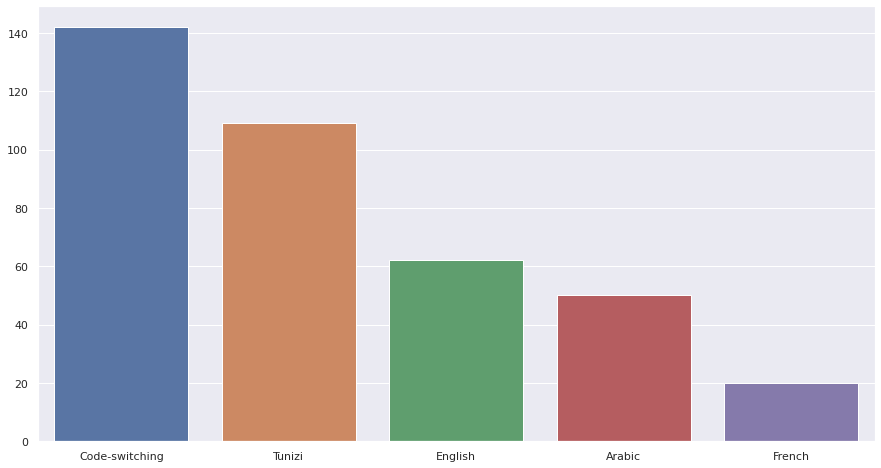

In [ ]:
#distribution
sns.set(rc={'figure.figsize':(15,8)})
per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=per_lang.index, y=per_lang.values)

In [ ]:
#visualisation of number of words in each label
word = {}
for label in list(final_scraped_data["labels"].unique()):
  data = final_scraped_data[final_scraped_data["labels"]==label]
  text = ""
  for i in range(len(data)) : text = text+data.iloc[i,1]+" "
  word[label] = len(text)

word_number = pd.DataFrame.from_dict(word,orient='index',columns=['count'])
word_number

,count
English,496
Arabic,350
French,140
Code-switching,2130
Tunizi,763


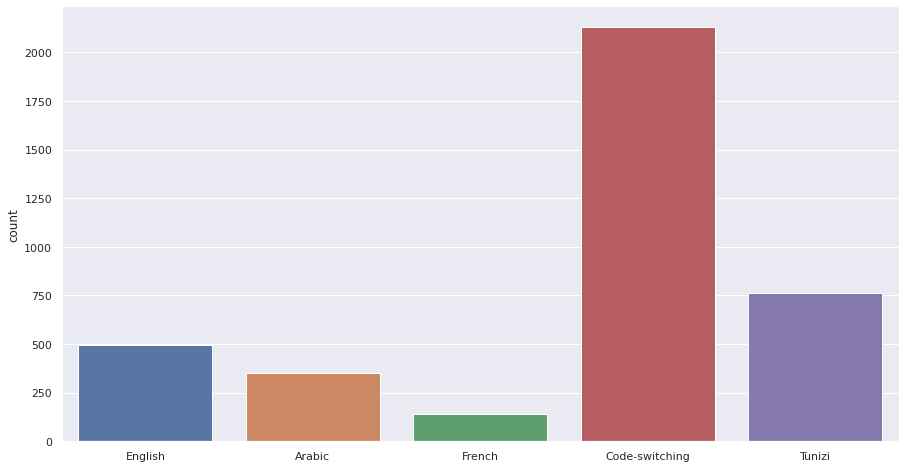

In [ ]:
#distribution
sns.set(rc={'figure.figsize':(15,8)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=word_number.index, y="count",data = word_number)

In [ ]:
#WordCloud for each languages
def wordcloud_lang(lang):
  df = final_scraped_data[final_scraped_data["labels"]==lang]
  text = ""
  for i in range(len(df)):
    text+= df.iloc[i,:]["comments"]
  '''
  if lang == "Arabic" : 
    text = get_display(arabic_reshaper.reshape(text))
    '''
  wordcloud = WordCloud(background_color = 'white',
                  mode='RGB', width=2000, height=1000, max_words = 50).generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show(); 


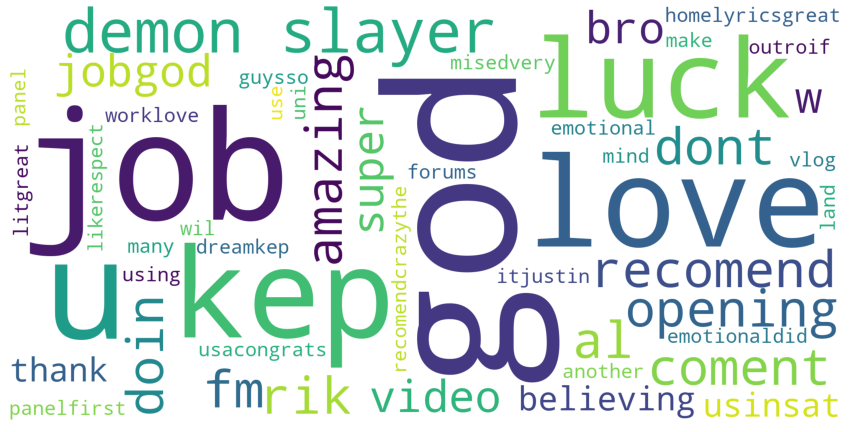

In [ ]:
wordcloud_lang("English")

###Analysis of public_data

In [ ]:
public_data.head()

,comments,labels
0,نعم هذا صحيح نعم اعتقد ان هناك خطوات كبيرة يتم...,Arabic
1,le produit mavait été recommandé par mon pharm...,French
2,jai beaucoup ce livre cependant je nai pas mis...,French
3,sur les dix premières clés essayées quatre inu...,French
4,didnt really seem to work much,English


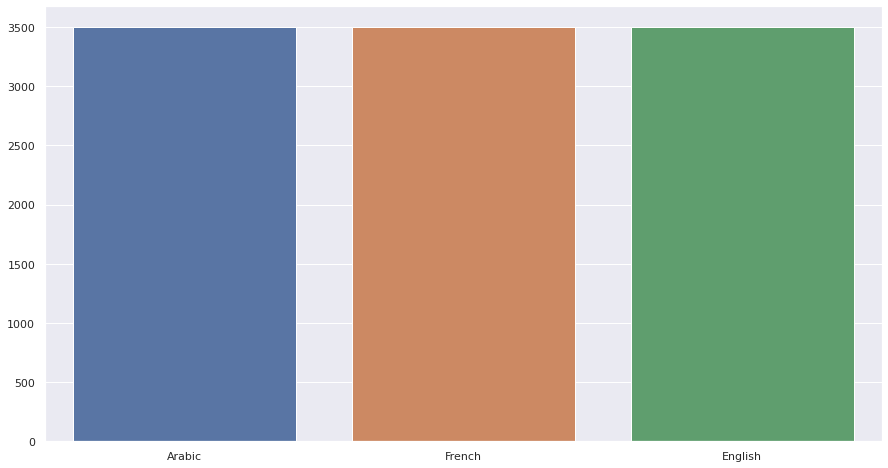

In [ ]:
#distribution
sns.set(rc={'figure.figsize':(15,8)})
per_lang = public_data['labels'].value_counts()
sns.barplot(x=per_lang.index, y=per_lang.values)

In [ ]:
#visualisation of number of words in each label
word = {}
for label in list(final_scraped_data["labels"].unique()):
  data = final_scraped_data[final_scraped_data["labels"]==label]
  text = ""
  for i in range(len(data)) : text = text+data.iloc[i,1]+" "
  word[label] = len(text)

word_number = pd.DataFrame.from_dict(word,orient='index',columns=['count'])
word_number

,count
English,496
Arabic,350
French,140
Code-switching,2130
Tunizi,763


###Analysis of tunizi_data

In [ ]:
tunizi_data.head()

,comments,labels
0,ana fil ghorba w sout el athan ahla haja 3ijbi...,Tunizi
1,man eheb rasoule mohamed,Tunizi
2,rabi yerhmou sofiane cha3ri,Tunizi
3,rabi yarahmak ya sbou3i wou yarham kol om mita,Tunizi
4,tomson et banane,Tunizi


In [ ]:
len(tunizi_data)

1498